<a href="https://colab.research.google.com/github/Harsh62004/Summer_School_2022/blob/main/TF_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Tensorflow and Keras

TensorFlow is an end-to-end platform for machine learning. It supports the following:

1. Multidimensional-array based numeric computation (similar to NumPy).
2. GPU and distributed processing
3. Automatic differentiation
4. Model construction, training, and export
5. And more

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import seaborn as sns

## Tensors

Tensorflow uses tensors for operation. Tensor is similar to array in numpy, but it is immutable, and has uniform type.

In [4]:
# Define a tensor using tf.constant
tensor =   tf.constant([1, 2, 3])

In [5]:
# Print the tensor
print(tensor)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [7]:
# Operations with tensor, multiply with 2
tensor= tensor * 2

In [8]:
# mltiply tensor with itself
tensor = tensor * tensor

In [9]:
# Try changing value of tensor
tensor = tf.constant([10, 20])

## Variable

In [31]:
# define variable with tf.Variable
variable =  tf.Variable([[1.0, 2.0, 3.0]])
print(variable)

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>


In [32]:
# use assign for changing value
variable = variable.assign([[10.0, 100.0, 400.0]])

In [34]:
print(variable)

<tf.Variable 'UnreadVariable' shape=(1, 3) dtype=float32, numpy=array([[ 10., 100., 400.]], dtype=float32)>


## Automatic Differentiation

In [36]:
# Find derivative of y = 2 * x
x = tf.Variable(50.0)

with tf.GradientTape() as tape:
  # write your equation here
  y = 2 * x

dy_dx = tape.gradient(y, x)

In [39]:
# Find derivative of y = x ^ 3
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
  # write equation here
  y = x ** 3

dy_dx = tape.gradient(y, x)

In [41]:
# chained differentiation
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
  y = x ** 2
  z = tf.sin(y)

tape.gradient(z, x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.6145744>

In [40]:
# Partial derivative
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
  z = x ** 2 + y ** 2

# tape.gradient(z, x)
# tape.gradient(z, y)

## Graph

In [42]:
@tf.function
def func(x):
  print('In function')
  return tf.math.reduce_mean(x)

In [43]:
x = tf.constant([3, 4, 5])

In [44]:
start = time.time()
func(x)
time.time() - start

In function


0.12322115898132324

## Layers

Layers are basically functions that have a reusable mathematical structure and also have trainable variables.

### Dense


https://keras.io/api/layers/core_layers/dense/

In [45]:
l1 = layers.Dense(1)

In [46]:
x = tf.constant([2.0], shape=(1, 1))

In [47]:
l1(x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.3094099]], dtype=float32)>

In [48]:
l1.variables

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.6547049]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

### Flatten

https://keras.io/api/layers/reshaping_layers/flatten/

In [49]:
l2 = layers.Flatten()

In [50]:
x = tf.constant([[1, 2, 4, 6], [5, 6, 7, 8]])
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[1, 2, 4, 6],
       [5, 6, 7, 8]], dtype=int32)>

In [51]:
l2(x)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[1, 2, 4, 6],
       [5, 6, 7, 8]], dtype=int32)>

In [52]:
x = tf.expand_dims(x, axis=0)

In [53]:
l2(x)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 4, 6, 5, 6, 7, 8]], dtype=int32)>

### Reshape

https://keras.io/api/layers/reshaping_layers/reshape/

In [54]:
x = tf.constant([[1, 2, 4, 6, 5, 6, 7, 8]])
x

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 4, 6, 5, 6, 7, 8]], dtype=int32)>

In [55]:
l3 = layers.Reshape((4, 2))

In [56]:
l3(x)

<tf.Tensor: shape=(1, 4, 2), dtype=int32, numpy=
array([[[1, 2],
        [4, 6],
        [5, 6],
        [7, 8]]], dtype=int32)>

### Conv

https://keras.io/api/layers/convolution_layers/convolution2d/

In [57]:
inp = np.arange(24, dtype=float).reshape(1, 6, 4, 1)
x = tf.constant(inp)
x

<tf.Tensor: shape=(1, 6, 4, 1), dtype=float64, numpy=
array([[[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.]],

        [[ 4.],
         [ 5.],
         [ 6.],
         [ 7.]],

        [[ 8.],
         [ 9.],
         [10.],
         [11.]],

        [[12.],
         [13.],
         [14.],
         [15.]],

        [[16.],
         [17.],
         [18.],
         [19.]],

        [[20.],
         [21.],
         [22.],
         [23.]]]])>

In [58]:
l4 = layers.Conv2D(1, (3, 3))

In [59]:
output = l4(x)
output = np.squeeze(output.numpy())

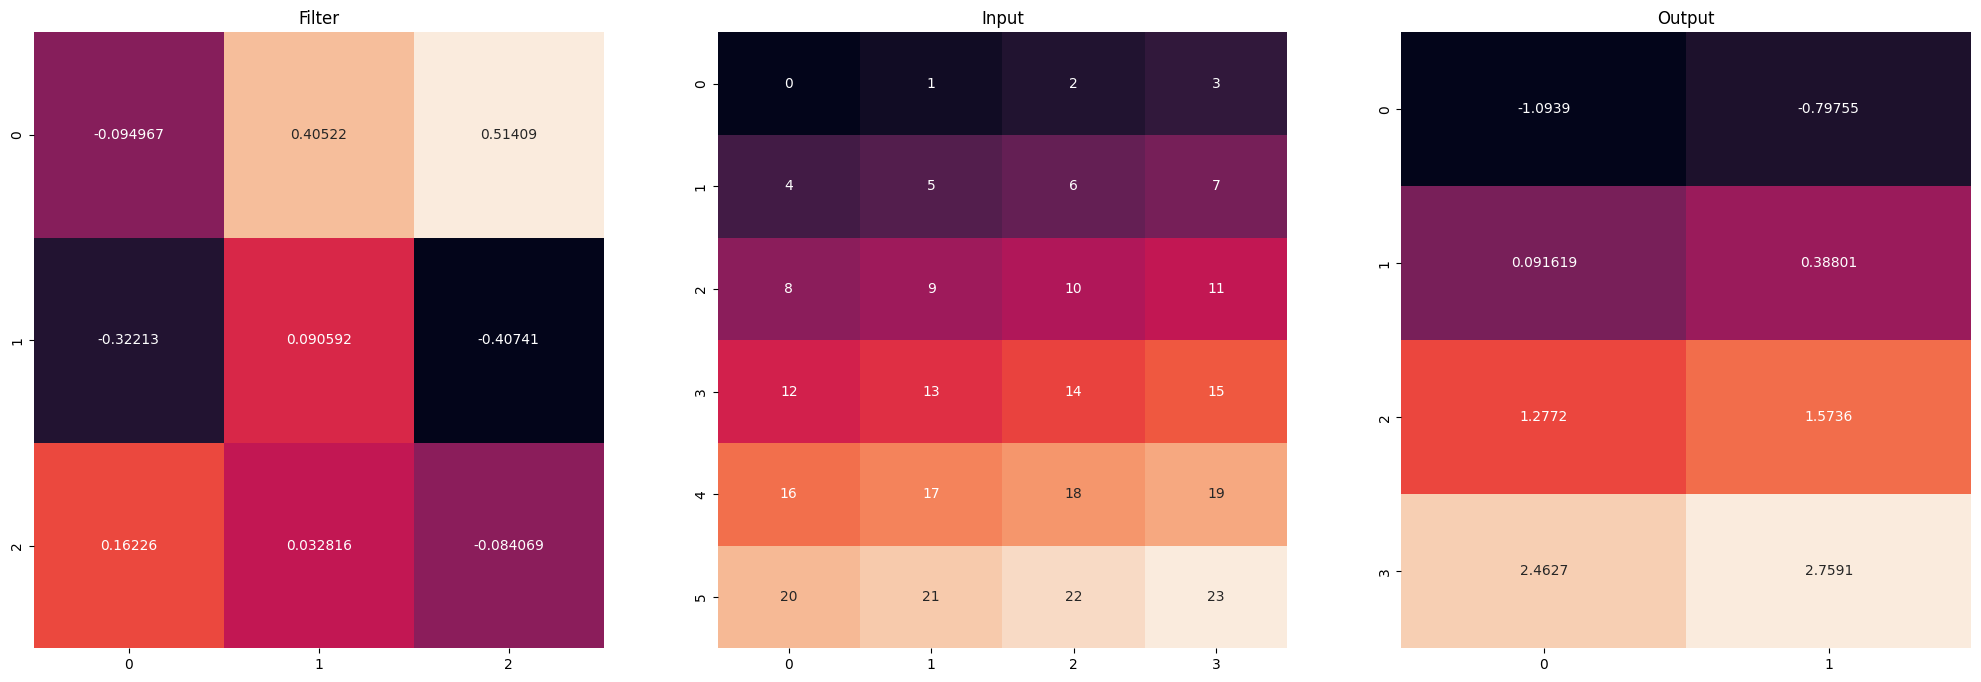

In [60]:
weights = np.squeeze(l4.weights[0].numpy())

fig, ax = plt.subplots(1, 3, figsize=(25, 8))

plt.subplot(1, 3, 1)
sns.heatmap(weights, annot=True, fmt='.5g', cbar=False)
plt.title('Filter')

plt.subplot(1, 3, 2)
sns.heatmap(np.squeeze(inp), annot=True, fmt='.5g', cbar=False)
plt.title('Input')

plt.subplot(1, 3, 3)
sns.heatmap(np.squeeze(output), annot=True, fmt='.5g', cbar=False)
plt.title('Output')

plt.show()

In [61]:
squeezed = np.squeeze(inp)
(weights * squeezed[0:3, 0:3]).sum()

-1.0939431190490723

### MaxPool

In [62]:
inp = np.arange(16, dtype=float)[::-1].reshape(1, 4, 4, 1)
x = tf.constant(inp)
x

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float64, numpy=
array([[[[15.],
         [14.],
         [13.],
         [12.]],

        [[11.],
         [10.],
         [ 9.],
         [ 8.]],

        [[ 7.],
         [ 6.],
         [ 5.],
         [ 4.]],

        [[ 3.],
         [ 2.],
         [ 1.],
         [ 0.]]]])>

In [63]:
l5 = layers.MaxPooling2D(pool_size=(2, 2))

In [64]:
output = l5(x)
output

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[15.],
         [13.]],

        [[ 7.],
         [ 5.]]]], dtype=float32)>

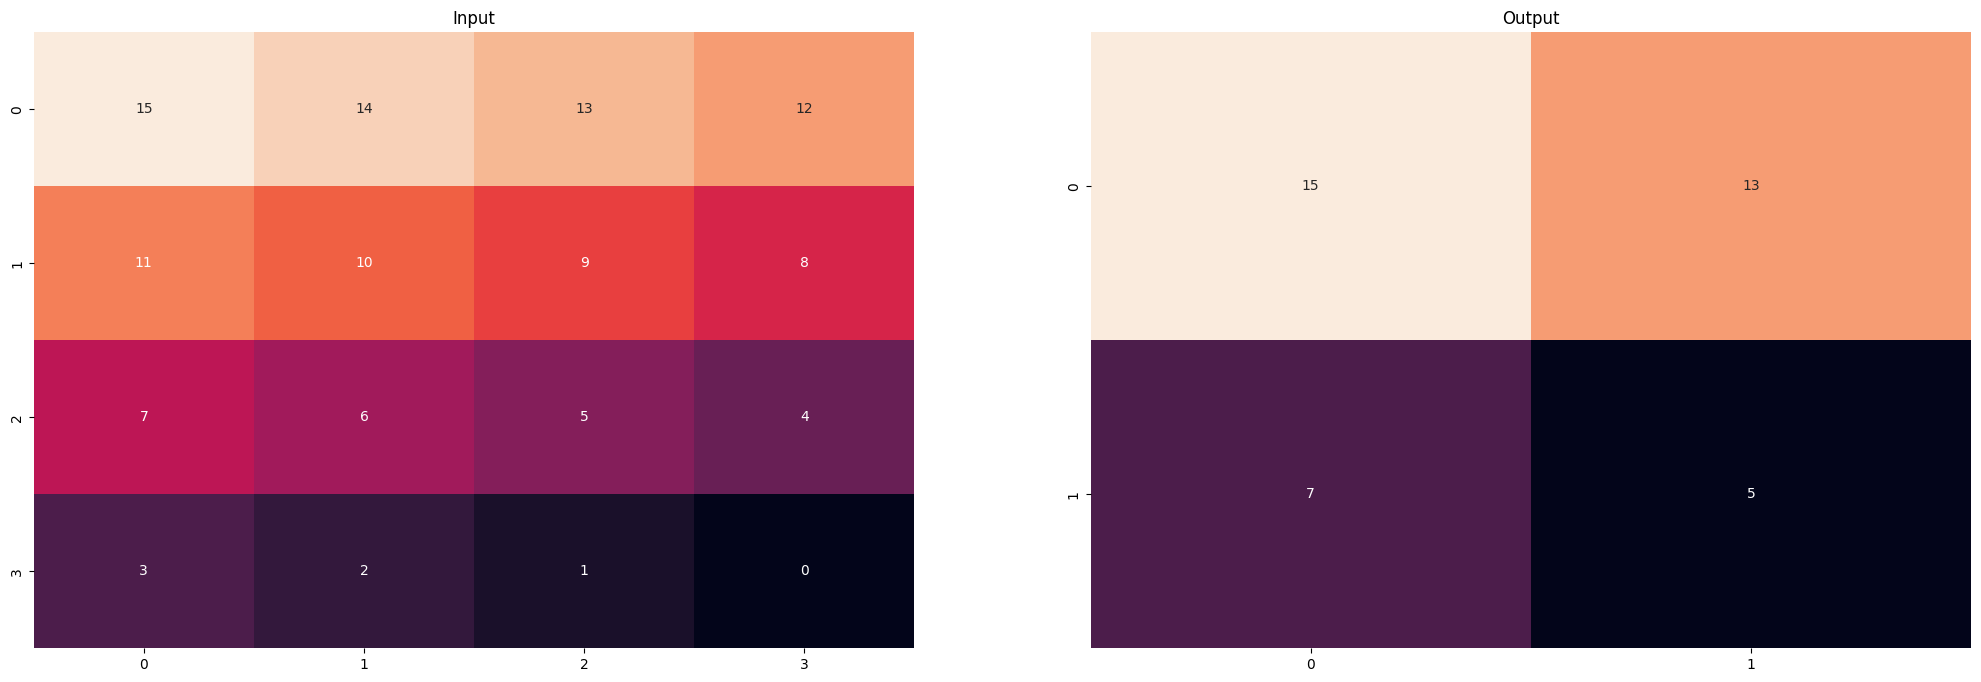

In [65]:
weights = np.squeeze(l4.weights[0].numpy())

fig, ax = plt.subplots(1, 2, figsize=(25, 8))

plt.subplot(1, 2, 1)
sns.heatmap(np.squeeze(inp), annot=True, fmt='.5g', cbar=False)
plt.title('Input')

plt.subplot(1, 2, 2)
sns.heatmap(np.squeeze(output), annot=True, fmt='.5g', cbar=False)
plt.title('Output')

plt.show()

## Model

Model is basically collection of layers. Overall it is a function which computes output for passed input.

In [66]:
model = keras.Sequential()
model.add(layers.Dense(3, input_shape=(1, )))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 6         
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='', loss='', metrics=[''])  # https://keras.io/api/models/model_training_apis/

In [ ]:
model.fit(x, y, epochs=2, batch_size=4)

In [ ]:
model.predict()

## Hands-on

In [77]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [78]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

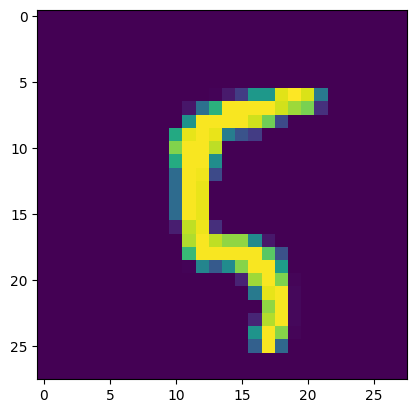

In [79]:
index = 100
plt.imshow(x_train[index])

In [80]:
y_train[index]

5

In [81]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [82]:
predictions = model.predict(np.expand_dims(x_train[100], axis=0))
predictions

1/1 [==============================] - 0s 185ms/step


array([[ 0.1891322 , -0.3768394 ,  0.3373436 , -0.02695857,  0.2167669 ,
        -0.10668021,  0.02385318, -0.42235038, -0.5254945 ,  0.5787451 ]],
      dtype=float32)

In [83]:
act = layers.Softmax()
act(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.11545794, 0.06555797, 0.13390326, 0.0930201 , 0.11869308,
        0.08589227, 0.09786876, 0.06264123, 0.0565022 , 0.17046317]],
      dtype=float32)>

In [84]:
tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [85]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [86]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2606 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1141 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0774 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0577 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0446 - accuracy: 0.9864


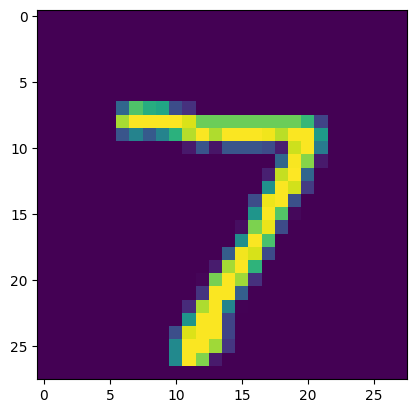

In [87]:
plt.imshow(x_test[0])

In [88]:
model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 59ms/step


array([[ -4.8838   , -10.353727 ,  -3.7950797,   3.3531892, -10.695137 ,
         -3.5229363, -10.283407 ,  10.356309 ,  -4.043708 ,  -1.2758579]],
      dtype=float32)